In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import joblib

In [2]:
# Load the dataset
data = pd.read_csv("data/LifeExpectancyData.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(1649, 22)

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1649, 22)

In [9]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
encoder = LabelEncoder()

In [11]:
data['Country'] = encoder.fit_transform(data['Country'])

In [12]:
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Argentina': 4, 'Armenia': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bangladesh': 9, 'Belarus': 10, 'Belgium': 11, 'Belize': 12, 'Benin': 13, 'Bhutan': 14, 'Bosnia and Herzegovina': 15, 'Botswana': 16, 'Brazil': 17, 'Bulgaria': 18, 'Burkina Faso': 19, 'Burundi': 20, 'Cabo Verde': 21, 'Cambodia': 22, 'Cameroon': 23, 'Canada': 24, 'Central African Republic': 25, 'Chad': 26, 'Chile': 27, 'China': 28, 'Colombia': 29, 'Comoros': 30, 'Costa Rica': 31, 'Croatia': 32, 'Cyprus': 33, 'Djibouti': 34, 'Dominican Republic': 35, 'Ecuador': 36, 'El Salvador': 37, 'Equatorial Guinea': 38, 'Eritrea': 39, 'Estonia': 40, 'Ethiopia': 41, 'Fiji': 42, 'France': 43, 'Gabon': 44, 'Georgia': 45, 'Germany': 46, 'Ghana': 47, 'Greece': 48, 'Guatemala': 49, 'Guinea': 50, 'Guinea-Bissau': 51, 'Guyana': 52, 'Haiti': 53, 'Honduras': 54, 'India': 55, 'Indonesia': 56, 'Iraq': 57, 'Ireland': 58, 'Israel': 59, 'Italy': 60, 'Jamaica': 61, 'Jordan': 62, '

In [13]:
data['Status'] = encoder.fit_transform(data['Status'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'Developed': 0, 'Developing': 1}


In [22]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [24]:
x = data.drop(columns="Life expectancy ")
y = data["Life expectancy "]

In [26]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [27]:
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [32]:
model = LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_train

360     73.3
2692    72.0
2546    73.7
983     73.8
1559    63.3
        ... 
1951    64.2
2223    65.8
1528    72.2
2576    73.5
1947    65.1
Name: Life expectancy , Length: 1484, dtype: float64

In [35]:
y_pred = model.predict(x_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_abs_err)

mean_sq_err = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error: ", mean_sq_err)

r2 = r2_score(y_test, y_pred)*100
print("R2 Score: ", r2)
print(model.score(x_test, y_test)*100)

Mean Absolute Error:  2.7682413725776076
Mean Squared Error:  12.755087692005421
R2 Score:  80.89500113236508
80.89500113236508


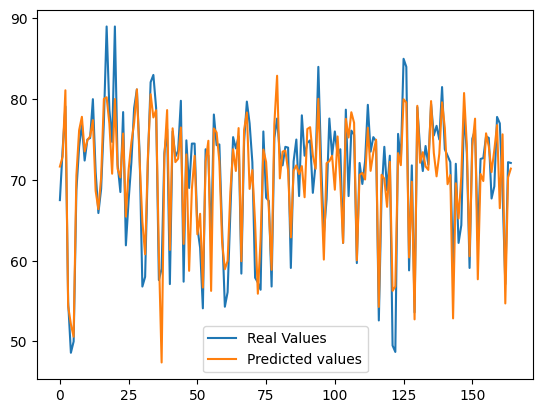

In [36]:
y_test_values = y_test.values.flatten()

plt.plot(y_test_values, label="Real Values")
plt.plot(y_pred, label="Predicted values")
plt.legend()
plt.show()

In [38]:
# Saving the model
joblib.dump(model, "life_expectancy_model.joblib")

['life_expectancy_model.joblib']